In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sympy import *
from sympy.abc import x, y
from numpy import linalg as LA

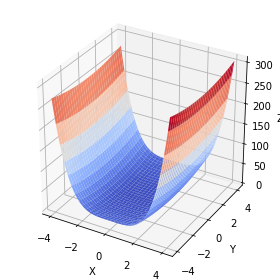

In [6]:
fig1 = plt.figure(figsize=plt.figaspect(1))
ax1 = fig1.add_subplot(1, 1, 1, projection='3d')

X = np.arange(-4, 4.25, 0.125)
Y = np.arange(-4, 4.25, 0.125)
X, Y = np.meshgrid(X, Y)
R = X**4 + Y**2 # 目标函数示意图
surf = ax1.plot_surface(X, Y, R, cmap=cm.coolwarm)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
plt.tight_layout()
plt.show()

In [7]:
def newton(func, init, 
           epsilon=1e-8, # 停止迭代条件
           freq=10000): # 训练次数
    z_matrix = Matrix([func])
    vector = Matrix([x, y])
    trail = list() # 所有轨迹点组成的列表
    trail.append(init.reshape(1, -1)[0].tolist())
    grad = z_matrix.jacobian(vector).transpose() # jacobian转置后即为梯度矩阵
    for _ in range(freq): # 也可使用递归实现
        g_k = matrix2numpy(grad.subs({x:init[0][0], y:init[1][0]}),
                           dtype=np.float32) # 计算g_k(梯度向量)
        g_k_norm = LA.norm(g_k, ord=2)
        hess = matrix2numpy(
            hessian(func, (x, y)).subs({x:init[0][0], y:init[1][0]}), 
            dtype=np.float32) # 计算H_k(hessian矩阵)
        solution = -np.linalg.solve(hess, g_k) # 通过解方程的方式求解出p_k
        init = init + solution
        trail.append(init.reshape(1, -1)[0].tolist())
        if g_k_norm < epsilon:
            break 

    return trail

In [8]:
z = x**4 + y**2 # 目标函数
init_values = np.array([[7], [5]]) # 初始值
newton(z, init_values) # 通过迭代不断接近最小值点

[[7, 5],
 [4.666666746139526, 0.0],
 [3.111111283302307, 0.0],
 [2.074074149131775, 0.0],
 [1.3827160596847534, 0.0],
 [0.9218106865882874, 0.0],
 [0.6145404577255249, 0.0],
 [0.4096936285495758, 0.0],
 [0.27312909066677094, 0.0],
 [0.1820860654115677, 0.0],
 [0.12139071151614189, 0.0],
 [0.08092714101076126, 0.0],
 [0.05395142547786236, 0.0],
 [0.035967616364359856, 0.0],
 [0.02397841028869152, 0.0],
 [0.01598560716956854, 0.0],
 [0.010657071601599455, 0.0],
 [0.007104714401066303, 0.0],
 [0.00473647634498775, 0.0],
 [0.0031576509354636073, 0.0],
 [0.002105100662447512, 0.0],
 [0.0014034004416316748, 0.0],
 [0.0009356002847198397, 0.0],
 [0.0006237335328478366, 0.0]]